In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#------load in data--------
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/data tcs/
filename = "/content/drive/MyDrive/data tcs/ccus_clean.csv"

df_ccus = pd.read_csv(filename, sep=',')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/data tcs


In [3]:
#-----import natural language tokenizer packages-------
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#---------tokenize data by removing all symbols and urls and @'s---------
stop_words = set(stopwords.words('english'))
def generate_ngrams(text, n):
    text = text.lower()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\'', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    return [' '.join(gram) for gram in ngrams(words, n)]

df_ccus['ngrams'] = df_ccus['Tweet'].apply(lambda x: generate_ngrams(x, 2))


In [5]:
#------lemmatize data---------
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df_ccus['lemmas'] = df_ccus['ngrams'].apply(lemmatize)

In [6]:
#-----create a dictionary & corpus-------
import gensim
import gensim.corpora as corpora
id2word = corpora.Dictionary(df_ccus['lemmas'])
texts = df_ccus['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]
from gensim.models import CoherenceModel

In [7]:
#----lda + coherence score-------
lda_ccus_10 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_ccus_10.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_ccus_10, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.046*"they" + 0.044*"s" + 0.024*"say" + 0.023*"could" + 0.022*"carbon" + 0.020*"their" + 0.017*"big" + 0.017*"want" + 0.016*"capture" + 0.016*"how"')
(1, '0.039*"tech" + 0.035*"t" + 0.030*"development" + 0.026*"fusion" + 0.025*"potential" + 0.023*"forest" + 0.022*"value" + 0.020*"costly" + 0.017*"biomass" + 0.016*"steel"')
(2, '0.038*"real" + 0.034*"end" + 0.029*"natural" + 0.025*"free" + 0.025*"resource" + 0.024*"sign" + 0.022*"between" + 0.021*"available" + 0.019*"esg" + 0.018*"please"')
(3, '0.061*"in" + 0.032*"investment" + 0.029*"project" + 0.028*"zero" + 0.027*"net" + 0.025*"ccus" + 0.021*"government" + 0.018*"with" + 0.016*"policy" + 0.015*"by"')
(4, '0.040*"on" + 0.033*"billion" + 0.018*"any" + 0.016*"source" + 0.014*"re" + 0.014*"energy" + 0.014*"call" + 0.014*"carboncapture" + 0.014*"after" + 0.012*"state"')
(5, '0.056*"project" + 0.040*"ccus" + 0.035*"construction" + 0.021*"read" + 0.020*"site" + 0.020*"pollution" + 0.019*"decarbonization" + 0.019*"company" + 0.016*"un

In [8]:
lda_ccus_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_ccus_5.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_ccus_5, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.064*"be" + 0.056*"the" + 0.037*"carbon" + 0.036*"capture" + 0.035*"to" + 0.025*"of" + 0.023*"and" + 0.021*"that" + 0.019*"a" + 0.015*"it"')
(1, '0.043*"energy" + 0.026*"and" + 0.023*"power" + 0.020*"hydrogen" + 0.018*"nuclear" + 0.015*"produce" + 0.014*"renewable" + 0.013*"support" + 0.012*"as" + 0.011*"wind"')
(2, '0.030*"carbon" + 0.025*"climate" + 0.024*"capture" + 0.021*"on" + 0.017*"solution" + 0.016*"change" + 0.012*"of" + 0.010*"real" + 0.007*"and" + 0.007*"from"')
(3, '0.060*"and" + 0.046*"the" + 0.042*"carbon" + 0.042*"in" + 0.038*"capture" + 0.032*"of" + 0.031*"storage" + 0.028*"to" + 0.024*"co" + 0.020*"ccs"')
(4, '0.047*"be" + 0.036*"the" + 0.035*"a" + 0.031*"to" + 0.017*"I" + 0.016*"on" + 0.016*"ccus" + 0.015*"not" + 0.013*"it" + 0.012*"of"')

Coherence Score:  0.408749368685468


In [9]:
lda_ccus_15 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=15,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_ccus_15.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_ccus_15, texts=df_ccus['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.113*"project" + 0.064*"their" + 0.063*"our" + 0.049*"world" + 0.047*"these" + 0.044*"tree" + 0.041*"go" + 0.035*"m" + 0.031*"come" + 0.028*"greenwashe"')
(1, '0.112*"big" + 0.066*"tech" + 0.061*"continue" + 0.058*"include" + 0.054*"after" + 0.049*"development" + 0.045*"h" + 0.035*"two" + 0.032*"base" + 0.029*"o"')
(2, '0.311*"solution" + 0.086*"real" + 0.058*"sustainable" + 0.050*"between" + 0.036*"pool" + 0.023*"link" + 0.021*"negative" + 0.018*"horse" + 0.017*"nice" + 0.013*"unfortunately"')
(3, '0.119*"emission" + 0.080*"reduce" + 0.060*"business" + 0.049*"future" + 0.041*"decarbonization" + 0.038*"lead" + 0.029*"zero" + 0.027*"reduction" + 0.026*"important" + 0.026*"announce"')
(4, '0.070*"billion" + 0.061*"want" + 0.038*"any" + 0.033*"source" + 0.032*"government" + 0.030*"call" + 0.025*"state" + 0.025*"eu" + 0.021*"job" + 0.020*"both"')
(5, '0.195*"or" + 0.172*"like" + 0.058*"problem" + 0.040*"actually" + 0.039*"over" + 0.031*"bp" + 0.029*"electric" + 0.029*"solve" + 0.025*

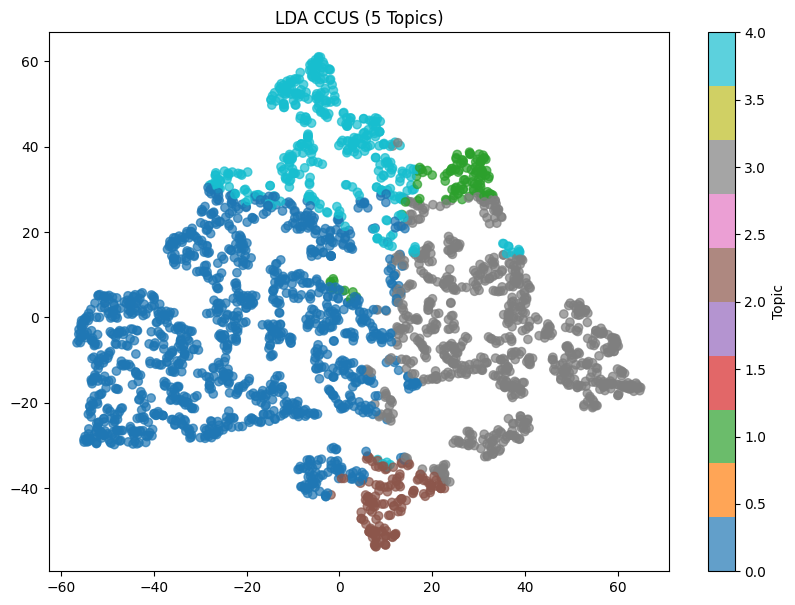

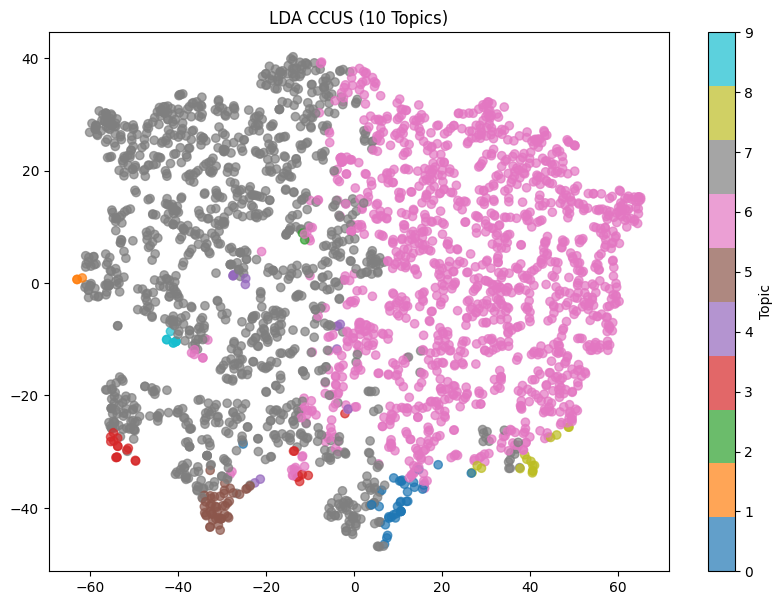

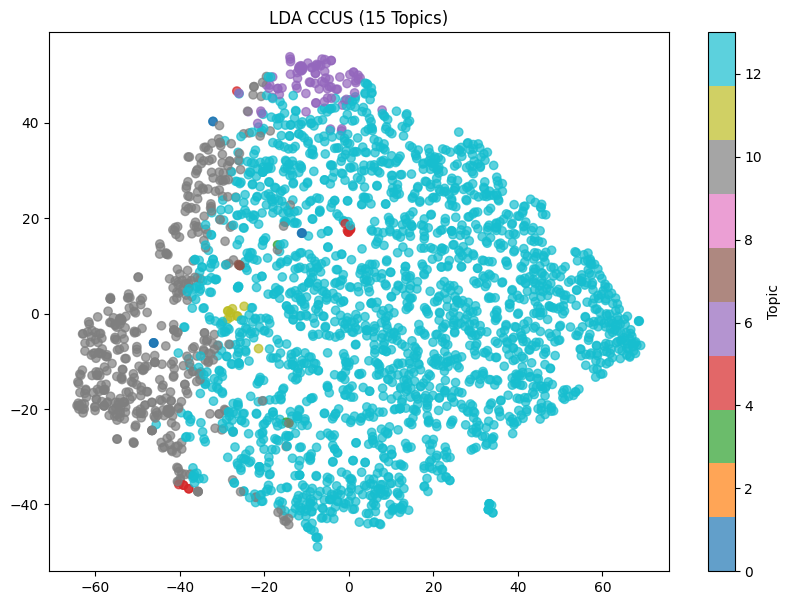

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize_lda_tsne(lda_model, corpus, num_topics, title="LDA t-SNE Visualization"):
    topic_matrix = np.array([[prob for _, prob in lda_model.get_document_topics(bow, minimum_probability=0)]
                             for bow in corpus])

    tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_coords = tsne_model.fit_transform(topic_matrix)

    dominant_topic = topic_matrix.argmax(axis=1)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=dominant_topic, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label="Topic")
    plt.title(f"{title} ({num_topics} Topics)")
    plt.show()

visualize_lda_tsne(lda_ccus_5, corpus, num_topics=5, title="LDA CCUS")
visualize_lda_tsne(lda_ccus_10, corpus, num_topics=10, title="LDA CCUS")
visualize_lda_tsne(lda_ccus_15, corpus, num_topics=15, title="LDA CCUS")

In [11]:
#---assign each tweet its dominant topic------
def get_dominant_topic(lda, bow):
    topic_probs = lda.get_document_topics(bow)
    return max(topic_probs, key=lambda x: x[1])[0]

df_ccus['Topic'] = [get_dominant_topic(lda_ccus_5, doc) for doc in corpus]

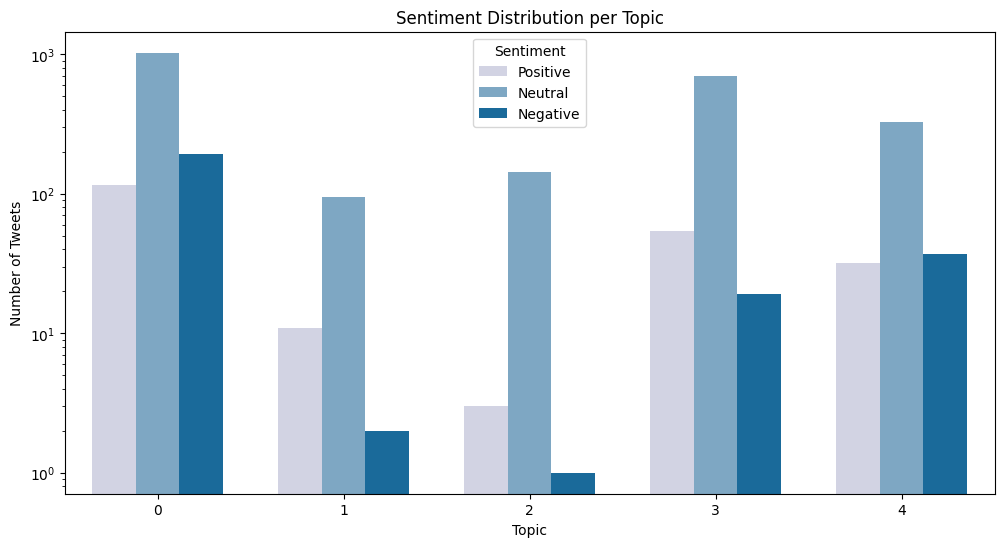

In [12]:
plt.figure(figsize=(12, 6))
scp = sns.countplot(x='Topic', hue='Sentiment', data=df_ccus, palette='PuBu', width=0.7)
scp.set_yscale('log')
plt.title("Sentiment Distribution per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.show()

In [25]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud

topics = lda_ccus_5.show_topics(num_topics=5, num_words=10, formatted=False)